<a href="https://colab.research.google.com/github/mohmmadhadi/Interpretable-ML/blob/main/Interpretable_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
install.packages("skimr")
install.packages("DataExplorer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(data.table)
library(tidyverse)
library(skimr)
library(DataExplorer)
library(lubridate)

In [8]:
# Modify this variable to your group name, which is formatted as FirstName1_LastName1-FirstName2_LastName2-...
GROUP_NAME <- "Group8"

## Loading Data

In [9]:
data <- read.csv("/content/Motor vehicle insurance data.csv", sep = ";")
summary(data)

       ID        Date_start_contract Date_last_renewal  Date_next_renewal 
 Min.   :    1   Length:105555       Length:105555      Length:105555     
 1st Qu.:12925   Class :character    Class :character   Class :character  
 Median :26082   Mode  :character    Mode  :character   Mode  :character  
 Mean   :26271                                                            
 3rd Qu.:39754                                                            
 Max.   :53502                                                            
                                                                          
  Date_birth        Date_driving_licence Distribution_channel   Seniority     
 Length:105555      Length:105555        Length:105555        Min.   : 1.000  
 Class :character   Class :character     Class :character     1st Qu.: 3.000  
 Mode  :character   Mode  :character     Mode  :character     Median : 4.000  
                                                              Mean   : 6.697  
     

In [10]:
options(max.print = 1000000, width = 200)
head(data)

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,⋯,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>
1,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,⋯,0,0,2004,80,599,7068,0,P,NA,190
2,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,⋯,0,0,2004,80,599,7068,0,P,NA,190
3,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,⋯,0,0,2004,80,599,7068,0,P,NA,190
4,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,⋯,0,0,2004,80,599,7068,0,P,NA,190
5,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,⋯,0,0,2004,80,599,7068,0,P,NA,190
6,2,26/09/2017,26/09/2018,26/09/2019,15/04/1956,20/03/1976,0,4,2,2,⋯,0,0,2004,80,599,7068,0,P,NA,190


In [11]:
glimpse(data)

Rows: 105,555
Columns: 30
$ ID                   <int> 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 8, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 1…
$ Date_start_contract  <chr> "05/11/2015", "05/11/2015", "05/11/2015", "05/11/2015", "26/09/2017", "26/09/2017", "29/11/2013", "29/11/2013", "29/11/2013", "29/11/2013", "21/10/2016", "21/10/2016", "…
$ Date_last_renewal    <chr> "05/11/2015", "05/11/2016", "05/11/2017", "05/11/2018", "26/09/2017", "26/09/2018", "29/11/2015", "29/11/2016", "29/11/2017", "29/11/2018", "21/10/2016", "21/10/2017", "…
$ Date_next_renewal    <chr> "05/11/2016", "05/11/2017", "05/11/2018", "05/11/2019", "26/09/2018", "26/09/2019", "29/11/2016", "29/11/2017", "29/11/2018", "29/11/2019", "21/10/2017", "21/10/2018", "…
$ Date_birth           <chr> "15/04/1956", "15/04/1956", "15/04/1956", "15/04/1956", "15/04/1956", "15/04/1956", "18/03/1975", "18/03/1975", "18/03/1975", "18/03/1975", "10/0

In [12]:
skim(data)

── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             105555
Number of columns          30    
_______________________          
Column type frequency:           
  character                8     
  numeric                  22    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable        n_missing complete_rate min max empty n_unique whitespace
1 Date_start_contract          0         1      10  10     0     5518          0
2 Date_last_renewal            0         1      10  10     0     1124          0
3 Date_next_renewal            0         1      10  10     0     1124          0
4 Date_birth                   0         1      10  10     0    17048          0
5 Date_drivi

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 17' in coercion to 'logical(1)'


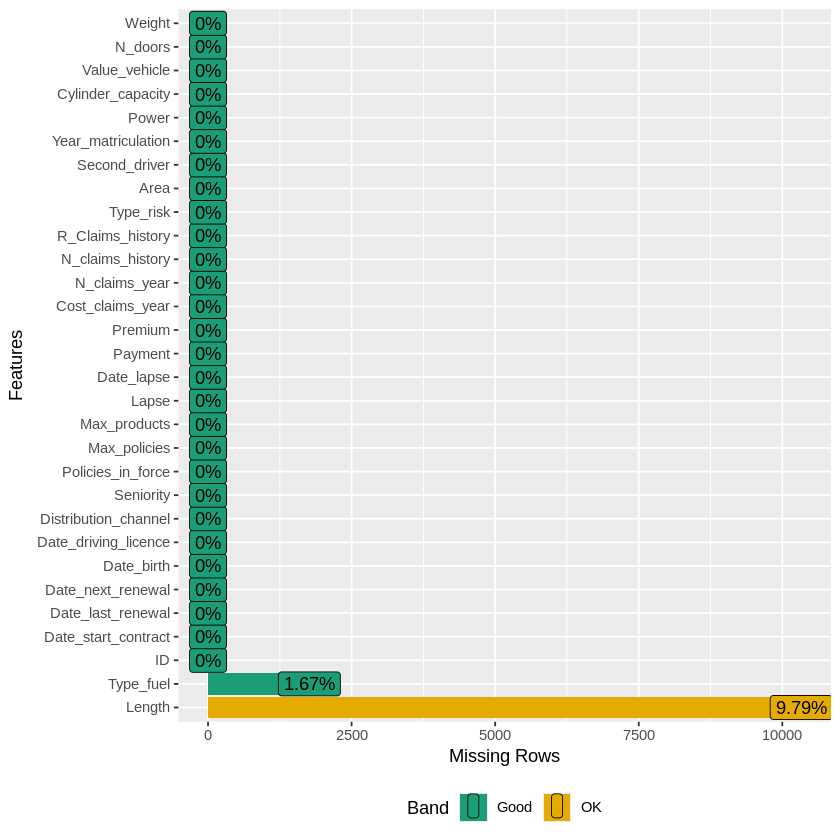

In [13]:
plot_missing(data)

# Preprocessing Data

## Cleaning

In [14]:
data <- data %>%
  mutate(
    Date_start_contract = dmy(Date_start_contract),
    Date_last_renewal = dmy(Date_last_renewal),
    Date_next_renewal = dmy(Date_next_renewal),
    Date_birth = dmy(Date_birth),
    Date_driving_licence = dmy(Date_driving_licence),
    Date_lapse = ifelse(Date_lapse == "", NA, Date_lapse),
    Date_lapse = dmy(Date_lapse),

    Distribution_channel = as.integer(Distribution_channel),
  )

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Distribution_channel = as.integer(Distribution_channel)`.
Caused by warning:
! NAs introduced by coercion”


In [15]:
str(data)

'data.frame':	105555 obs. of  30 variables:
 $ ID                  : int  1 1 1 1 2 2 3 3 3 3 ...
 $ Date_start_contract : Date, format: "2015-11-05" "2015-11-05" "2015-11-05" "2015-11-05" ...
 $ Date_last_renewal   : Date, format: "2015-11-05" "2016-11-05" "2017-11-05" "2018-11-05" ...
 $ Date_next_renewal   : Date, format: "2016-11-05" "2017-11-05" "2018-11-05" "2019-11-05" ...
 $ Date_birth          : Date, format: "1956-04-15" "1956-04-15" "1956-04-15" "1956-04-15" ...
 $ Date_driving_licence: Date, format: "1976-03-20" "1976-03-20" "1976-03-20" "1976-03-20" ...
 $ Distribution_channel: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Seniority           : int  4 4 4 4 4 4 15 15 15 15 ...
 $ Policies_in_force   : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Max_policies        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Max_products        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Lapse               : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Date_lapse          : Date, format: NA NA NA NA ...
 $ Payment             : int  0 0 0 0 1 1 0 

In [16]:
preprocess_data <- function(data) {
  df_processed <- data %>%

    # date of birth → age
    mutate(Age = as.integer(floor(interval(ymd(Date_birth), Sys.Date()) / years(1)))) %>%

    # date of driving licence → year of driving experience
    mutate(Driving_experience = as.integer(floor(interval(ymd(Date_driving_licence), Sys.Date()) / years(1)))) %>%

    # Lapse → Nan → 0
    mutate(Lapse = ifelse(is.na(Lapse), 0, Lapse)) %>%

    # Date_lapse → Time remained until the end of contract
    mutate(
      Lapse_duration_days = as.numeric(Date_lapse - Date_start_contract)
    ) %>%

    mutate(
    Lapse_duration_days = ifelse(Lapse == 0, 0, Lapse_duration_days),
    Has_lapsed = ifelse(Lapse == 0, 0, 1)
    ) %>%

    mutate(
    Lapse_duration_days = replace_na(Lapse_duration_days, 0),
    Has_lapsed = replace_na(Has_lapsed, 0)) %>%

    # car_age
    mutate(Car_age = 2019 - as.integer(Year_matriculation)) %>%

    group_by(Type_risk) %>%
    mutate(Type_fuel = ifelse(is.na(Type_fuel),
                              names(sort(table(Type_fuel), decreasing = TRUE))[1],
                              Type_fuel)) %>%
    ungroup() %>%
    mutate(
      Fuel_Petrol = ifelse(Type_fuel == "P", 1, 0),
      Fuel_Diesel = ifelse(Type_fuel == "D", 1, 0)
    ) %>%

    mutate(Distribution_channel = ifelse(is.na(Distribution_channel), "Missing", Distribution_channel)) %>%
    mutate(Distribution_channel = as.factor(Distribution_channel)) %>%

    # Length
    group_by(Type_risk) %>%
    mutate(
      Length = ifelse(is.na(Length), mean(Length, na.rm = TRUE), Length)
    ) %>%
    ungroup()

  return(df_processed)
}


In [17]:
processed_df <- preprocess_data(data)
head(processed_df)

ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,⋯,Type_fuel,Length,Weight,Age,Driving_experience,Lapse_duration_days,Has_lapsed,Car_age,Fuel_Petrol,Fuel_Diesel
<int>,<date>,<date>,<date>,<date>,<date>,<fct>,<int>,<int>,<int>,⋯,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015-11-05,2015-11-05,2016-11-05,1956-04-15,1976-03-20,0,4,1,2,⋯,P,3.343,190,69,49,0,0,15,1,0
1,2015-11-05,2016-11-05,2017-11-05,1956-04-15,1976-03-20,0,4,1,2,⋯,P,3.343,190,69,49,0,0,15,1,0
1,2015-11-05,2017-11-05,2018-11-05,1956-04-15,1976-03-20,0,4,2,2,⋯,P,3.343,190,69,49,0,0,15,1,0
1,2015-11-05,2018-11-05,2019-11-05,1956-04-15,1976-03-20,0,4,2,2,⋯,P,3.343,190,69,49,0,0,15,1,0
2,2017-09-26,2017-09-26,2018-09-26,1956-04-15,1976-03-20,0,4,2,2,⋯,P,3.343,190,69,49,0,0,15,1,0
2,2017-09-26,2018-09-26,2019-09-26,1956-04-15,1976-03-20,0,4,2,2,⋯,P,3.343,190,69,49,0,0,15,1,0


In [18]:
processed_df <- processed_df %>% select(-Date_lapse, -Premium)

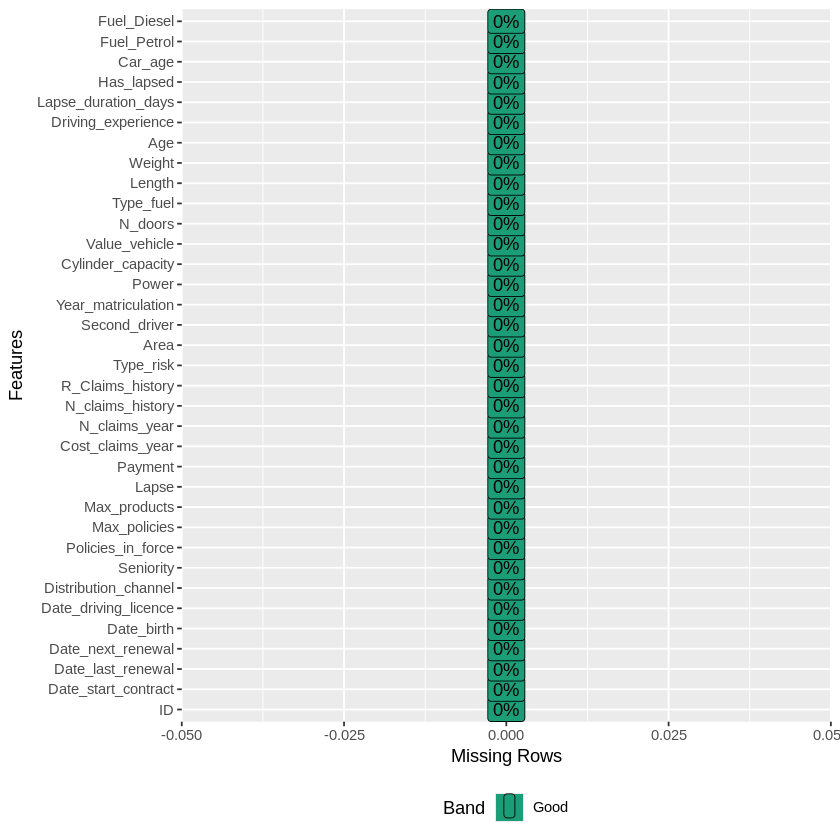

In [19]:
plot_missing(processed_df)

In [22]:
df_model <- processed_df %>%
  select(Age, Driving_experience, Car_age,
         Fuel_Petrol, Fuel_Diesel, Distribution_channel, Type_risk,
         Area, Second_driver, Power, Cylinder_capacity, Value_vehicle,
         Length, Weight, N_doors)

target_model <- processed_df$Cost_claims_year

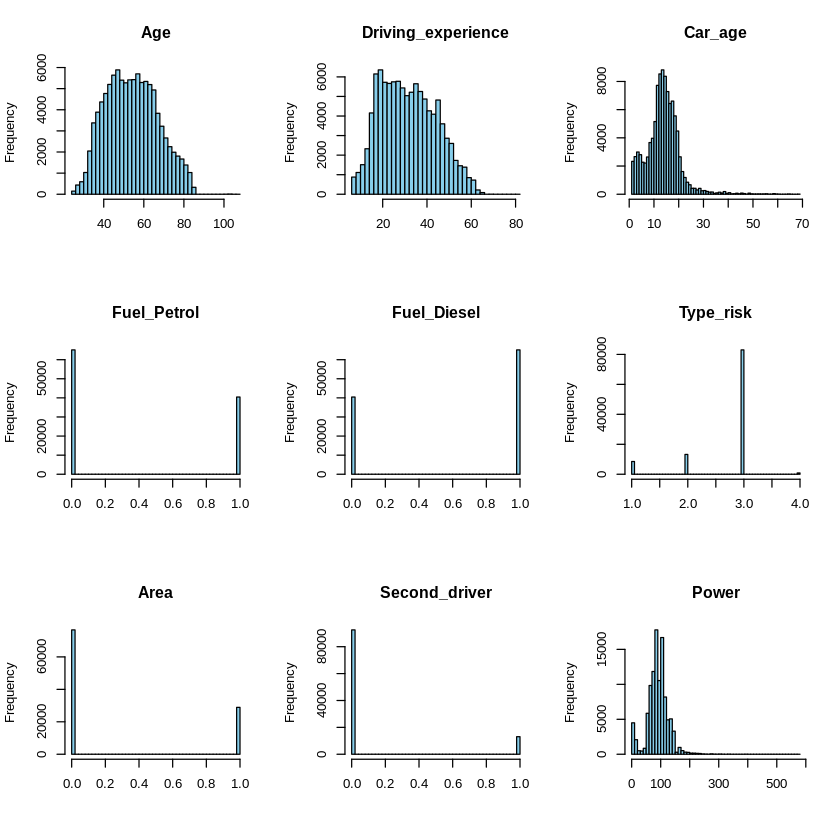

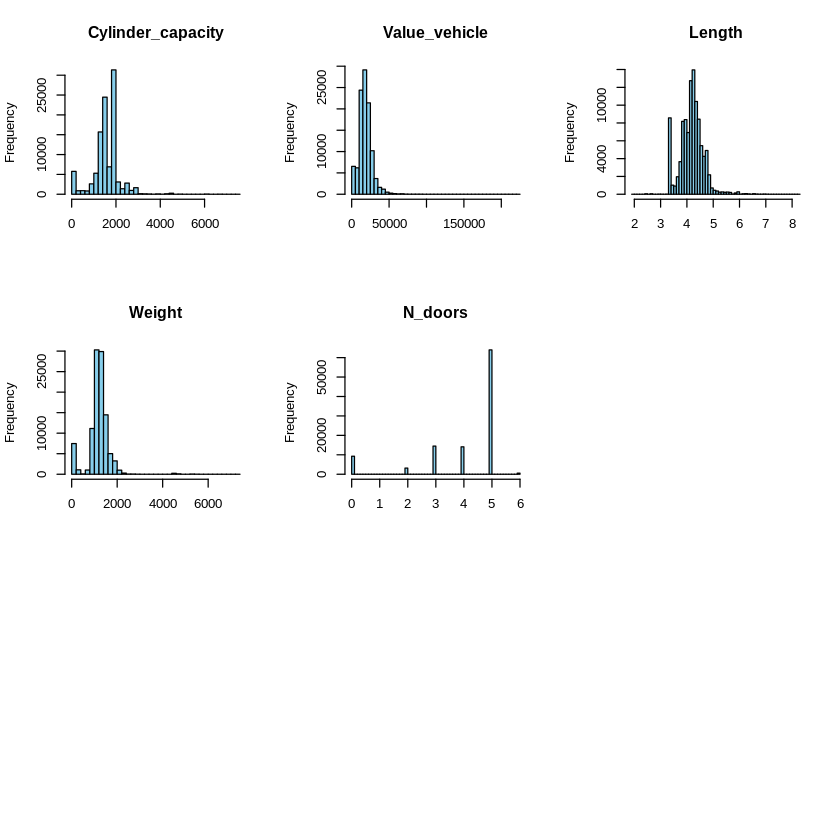

In [23]:
numeric_cols <- df_model %>% select(where(is.numeric))

par(mfrow = c(3, 3)) # 3x3 layout

for (col in names(numeric_cols)) {
  hist(numeric_cols[[col]], main = col, xlab = "", col = "skyblue", breaks = 50)
}

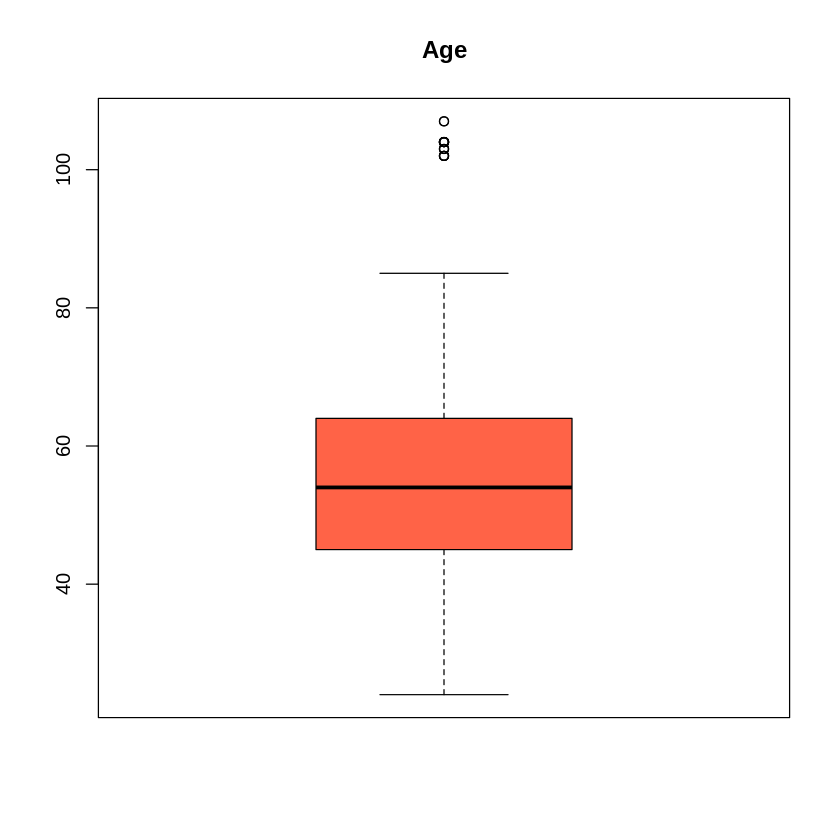

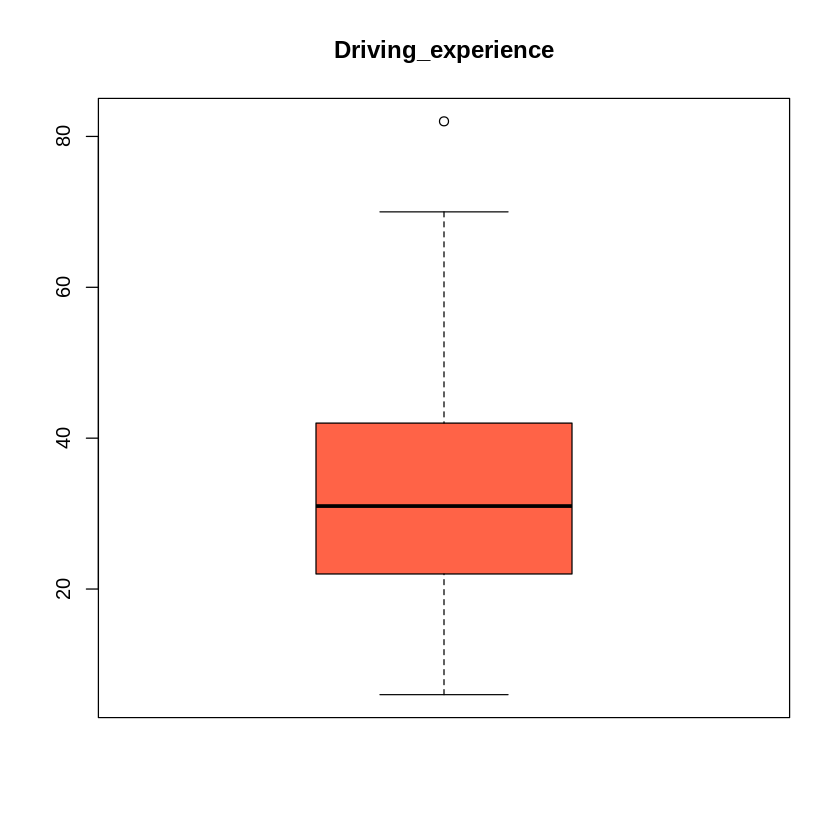

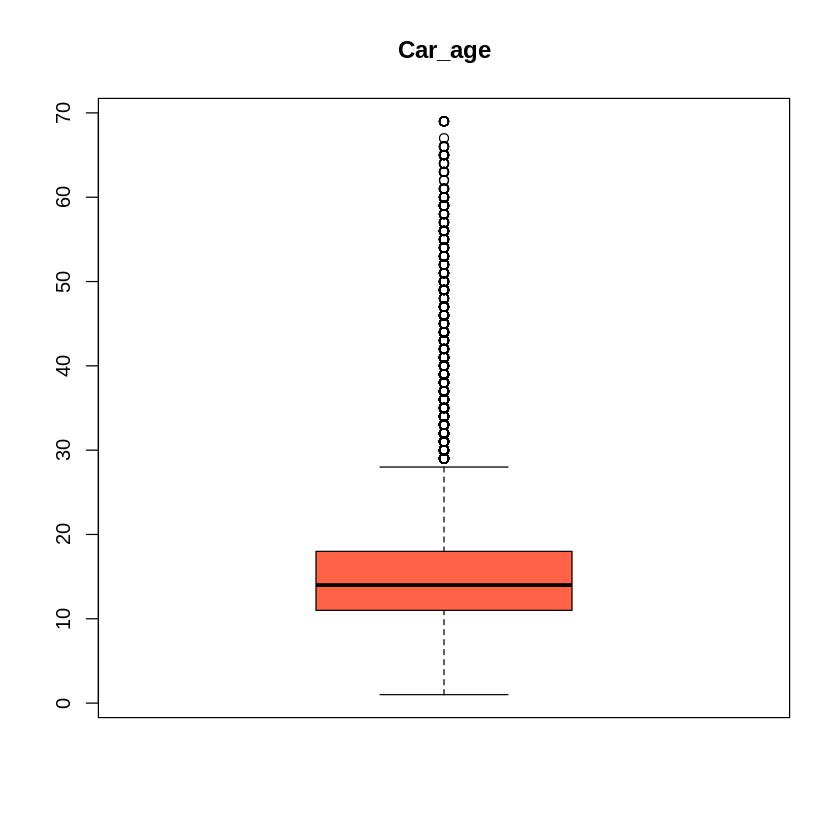

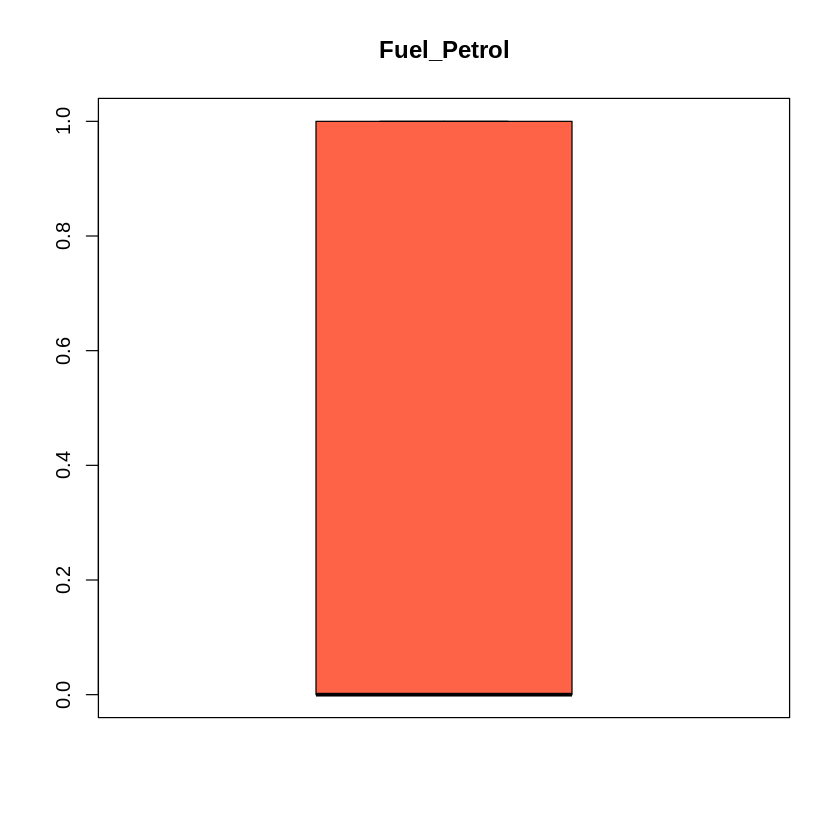

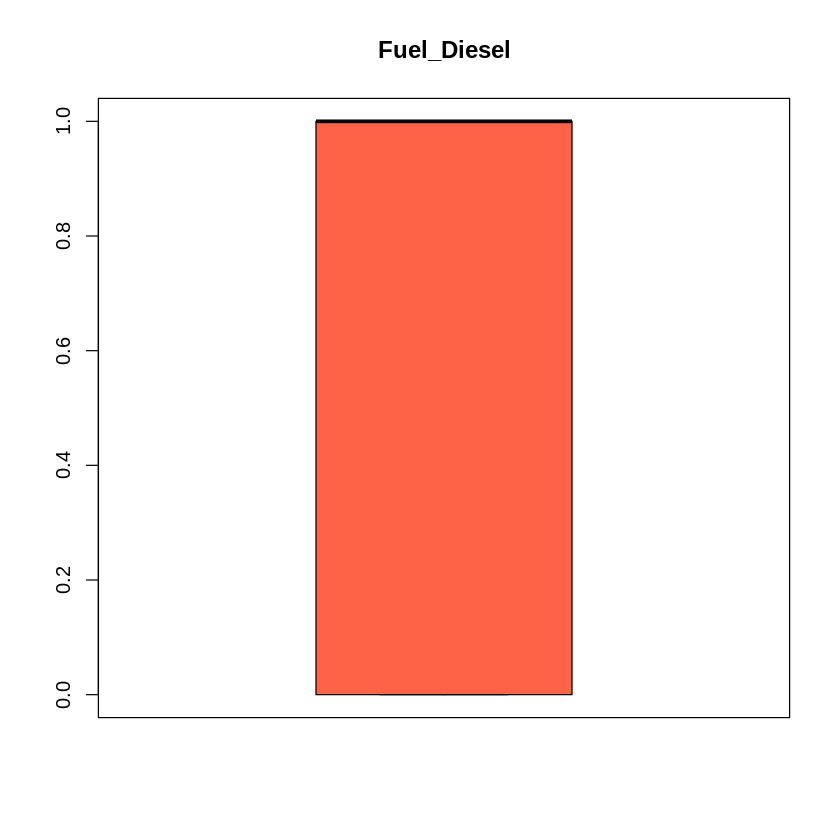

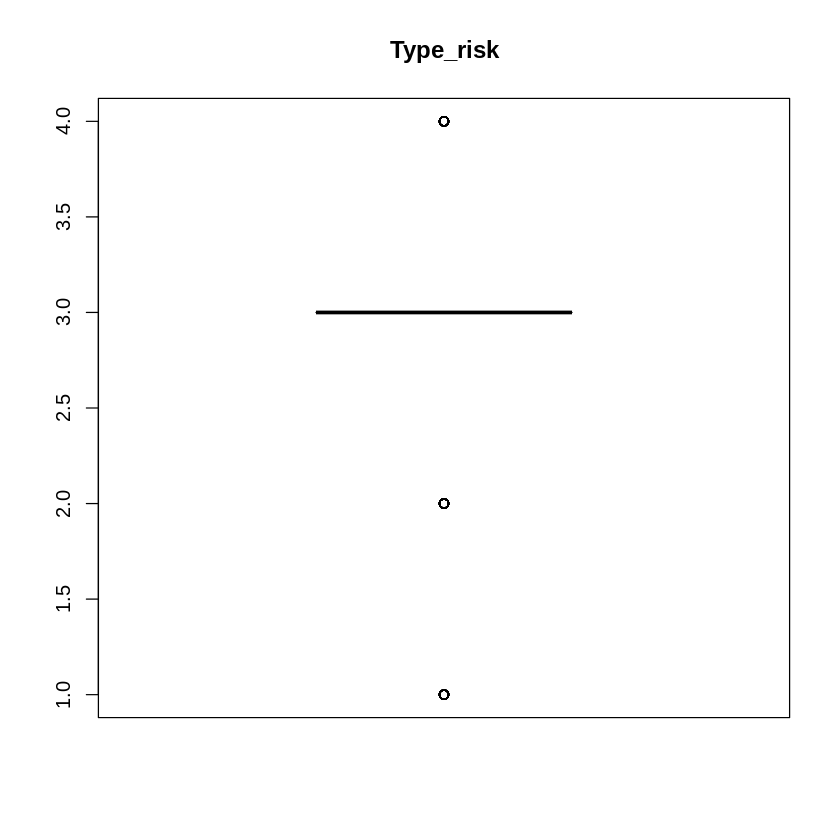

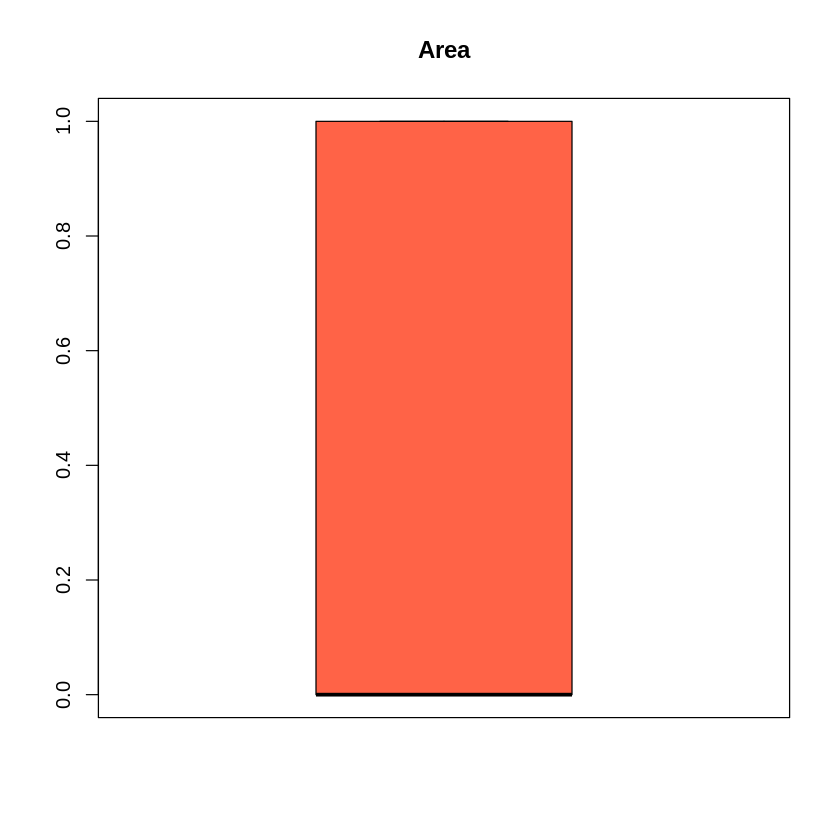

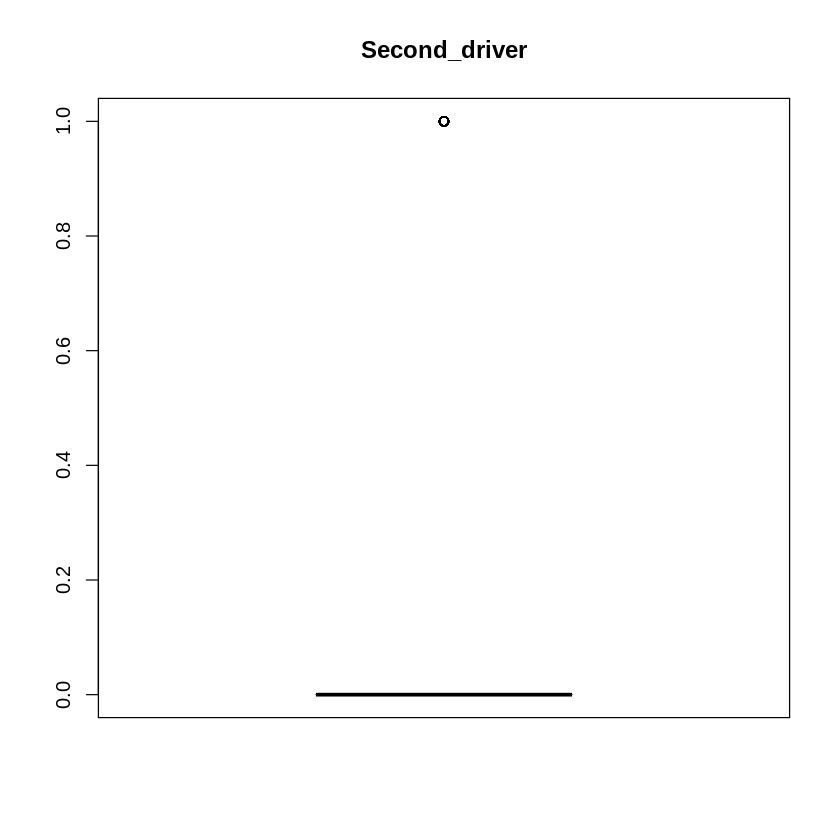

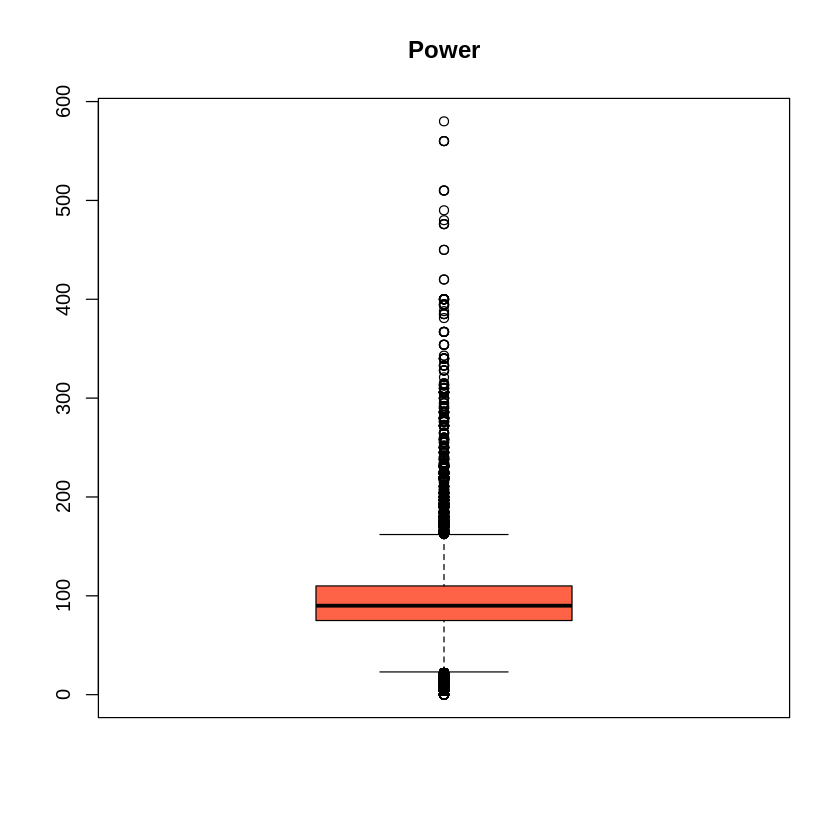

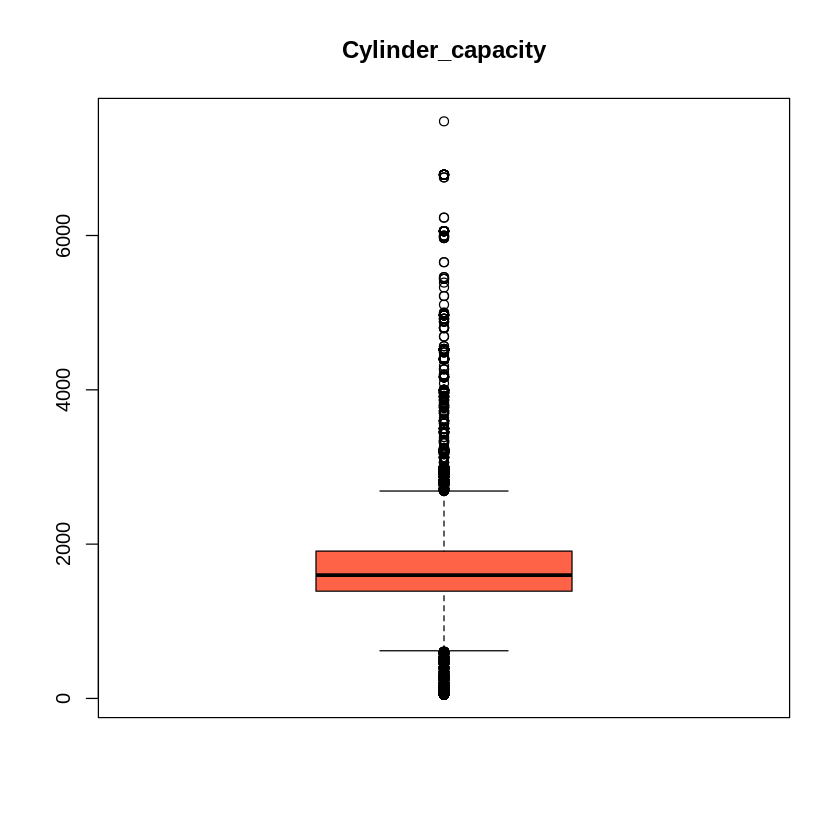

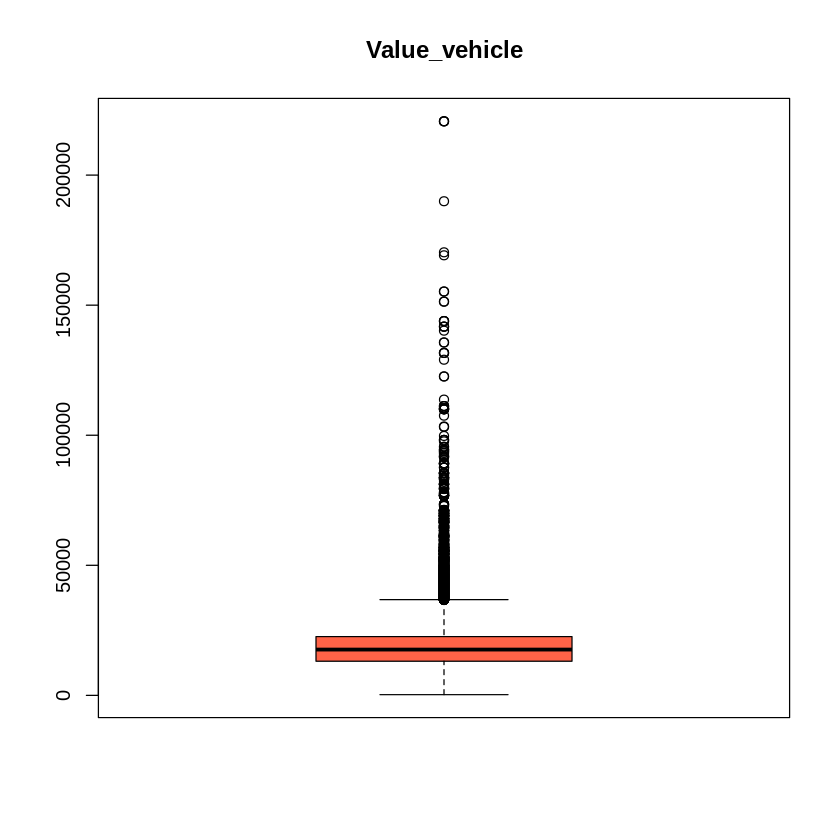

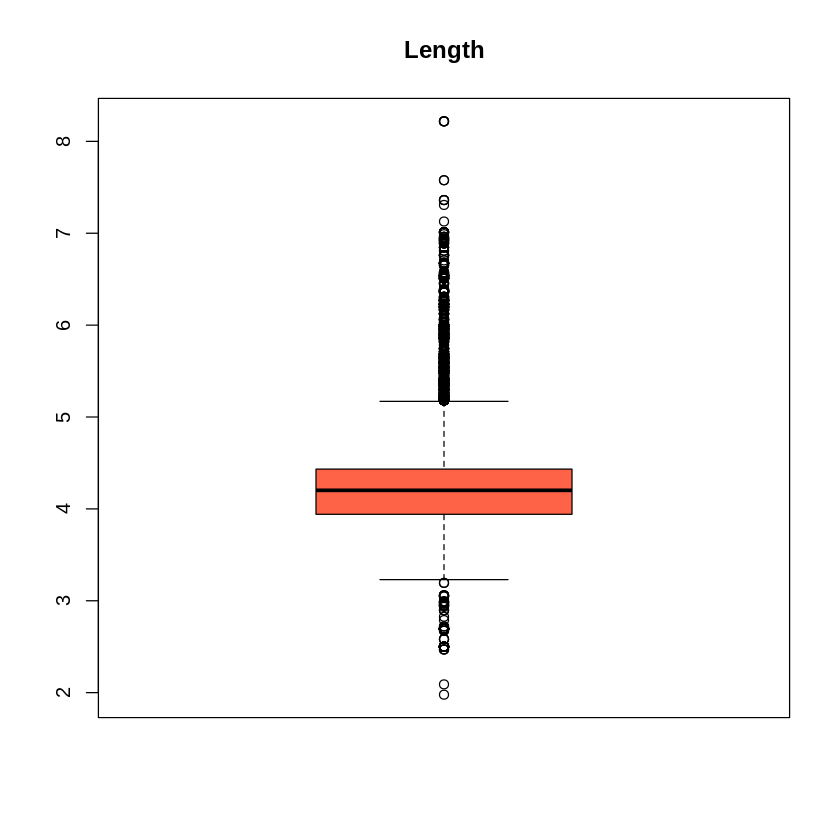

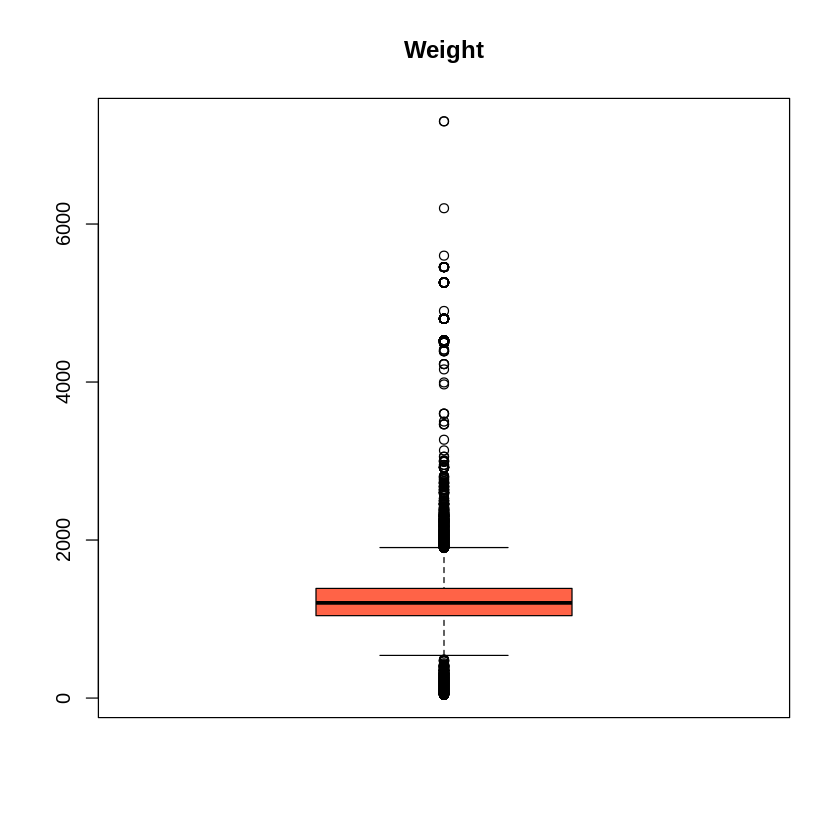

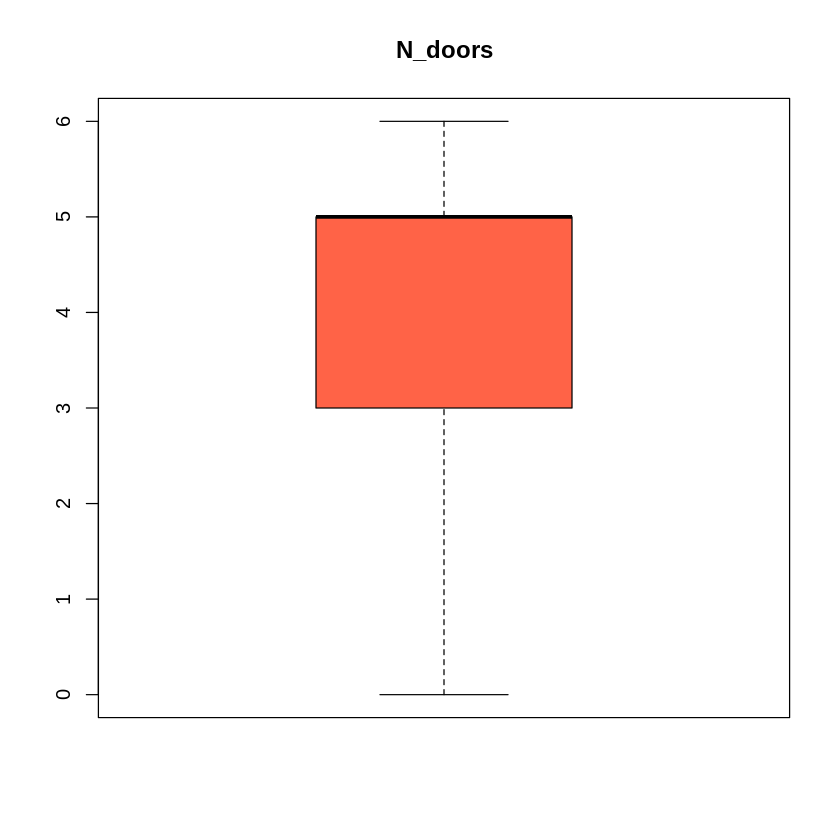

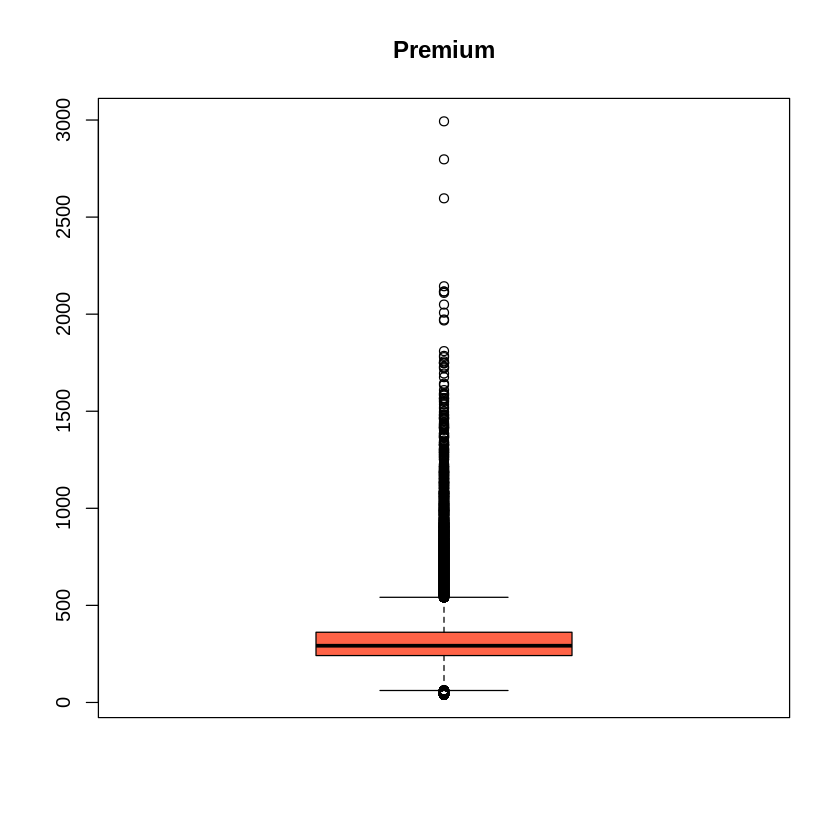

In [ ]:
for (col in names(numeric_cols)) {
  boxplot(numeric_cols[[col]], main = col, col = "tomato")
}

In [ ]:
skim(processed_df)

── Data Summary ────────────────────────
                           Values      
Name                       processed_df
Number of rows             105555      
Number of columns          36          
_______________________                
Column type frequency:                 
  character                1           
  Date                     5           
  factor                   1           
  numeric                  29          
________________________               
Group variables            None        

── Variable type: character ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 Type_fuel             0             1   1   1     0        2          0

── Variable type: Date ─────────────────────────────────────────────────────────────────────────────────────────────────────────

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 24' in coercion to 'logical(1)'


In [ ]:
names(data)

[1] "ID"                   "Date_start_contract"  "Date_last_renewal"   
 [4] "Date_next_renewal"    "Date_birth"           "Date_driving_licence"
 [7] "Distribution_channel" "Seniority"            "Policies_in_force"   
[10] "Max_policies"         "Max_products"         "Lapse"               
[13] "Date_lapse"           "Payment"              "Premium"             
[16] "Cost_claims_year"     "N_claims_year"        "N_claims_history"    
[19] "R_Claims_history"     "Type_risk"            "Area"                
[22] "Second_driver"        "Year_matriculation"   "Power"               
[25] "Cylinder_capacity"    "Value_vehicle"        "N_doors"             
[28] "Type_fuel"            "Length"               "Weight"

In [ ]:
data <- data[!is.na(data$Cost_claims_year),]

In [ ]:
X <- data[, -which(names(data) == "Cost_claims_year")]
y <- data$Cost_claims_year

In [ ]:
names(X)

[1] "ID"                   "Date_start_contract"  "Date_last_renewal"   
 [4] "Date_next_renewal"    "Date_birth"           "Date_driving_licence"
 [7] "Distribution_channel" "Seniority"            "Policies_in_force"   
[10] "Max_policies"         "Max_products"         "Lapse"               
[13] "Date_lapse"           "Payment"              "Premium"             
[16] "N_claims_year"        "N_claims_history"     "R_Claims_history"    
[19] "Type_risk"            "Area"                 "Second_driver"       
[22] "Year_matriculation"   "Power"                "Cylinder_capacity"   
[25] "Value_vehicle"        "N_doors"              "Type_fuel"           
[28] "Length"               "Weight"

In [ ]:

filtered_data <- data[!is.na(data),]
head(filtered_data)
summary(filtered_data)
filtered_data2 <- filtered_data[filtered_data$ID == NaN]
# Define the train function, assume that X is a data.table and y is a vector of responses of the same length as the number of rows in X
train_model <- function(X, y) {
  # Do your training here, do hyperparameter tuning, etc.
  # The following code is an example of how to train a simple xgboost model in mlr3

  # ---- MODIFY THIS SECTION ----
  library(mlr3verse)
  library(mlr3)
  library(mlr3learners)
  library(mlr3tuning)
  library(mlr3pipelines)

  task <- as_task_regr(data.table(X, y = y), target = "y")

  # Select only numeric columns for training
  select_num <- po("select", selector = selector_type(c("numeric", "integer")))

  learner <- select_num %>>%
    lrn("regr.xgboost",
      nrounds = to_tune(10, 100),
      max_depth = to_tune(1, 10),
      eta = to_tune(0.01, 0.1)
    )


  at <- auto_tuner(
    tuner = tnr("grid_search"),
    learner = learner,
    resampling = rsmp("cv", folds = 5),
    measure = msr("regr.mse"),
    term_evals = 10
  )
  at$train(task)
  model <- at$learner

  # ---- END OF MODIFY THIS SECTION ----

  predict_fun <- function(test_X) {
    # assume that test_X is the same format as X
    # call your model here, e.g. in mlr3 you can use the predict function
    # ---- MODIFY THIS SECTION ----
    preds <- model$predict_newdata(test_X)
    return(preds$response)
    # ---- END OF MODIFY THIS SECTION ----
  }

  return(predict_fun)
}

# run the following function to check if your train_model function is working
# do not modify this function
test_model_passes <- function() {
  data <- fread("Motor vehicle insurance data.csv", sep = ";")

  X <- data[, -c("Cost_claims_year")]
  y <- data$Cost_claims_year

  train_idx <- sample(seq_along(y), 10000)
  test_idx <- sample(setdiff(seq_along(y), train_idx), 10000)

  train_X <- X[train_idx]
  train_y <- y[train_idx]
  test_X <- X[test_idx]
  test_y <- y[test_idx]

  predict_fun <- train_model(train_X, train_y)

  pred <- predict_fun(test_X)
  pred_baseline <- mean(train_y)
  MSE <- mean((pred - test_y)^2)
  baseline_MSE <- mean((pred_baseline - test_y)^2)

  print(paste("MSE:", MSE))
  print(paste("Baseline MSE:", baseline_MSE))
}

# uncomment this line to test your model
# test_model_passes()
